<a href="https://colab.research.google.com/github/Theerachod/automated-screenshot-project/blob/main/auto_screenshot_copy_and_paste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title #**SET UP**

# text_height = max(thai_font.getsize(word)[1] if word not in emoji_set else emoji_font.getsize(word)[1]  for word in split_emoji) + 5

#Install libraries
!pip install python-pptx
!pip install pandas
!pip install colorama
!pip install requests
!pip install pythainlp
!pip install pilmoji
!pip install emoji

#Import necessary libraries
from google.colab import files
from IPython.display import clear_output
from colorama import Fore, Style
import ipywidgets as widgets
import os
import shutil
import requests
import io
import re
import math
import emoji
import warnings
from PIL import Image, ImageDraw, ImageFont
from pilmoji import Pilmoji
from pilmoji.source import TwemojiEmojiSource
from pythainlp import word_tokenize
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
pd.set_option("display.max_columns", 20)

# Create function to download font
def download_file(url):
    local_filename = url.split("/")[-1]
    r = requests.get(url)
    with open(local_filename, "wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return

# Font url
sarabun_font_url = "https://github.com/Theerachod/automated-screenshot-project/raw/main/Fonts/Sarabun-Regular.ttf"
noto_font_url = "https://github.com/Theerachod/automated-screenshot-project/raw/main/Fonts/NotoColorEmoji-Regular.ttf"

# Download font
download_file(sarabun_font_url)
download_file(noto_font_url)

# Create function to get dummy user image
def get_image_url(url):
    r = requests.get(url)
    content = r.content
    image = Image.open(io.BytesIO(content))
    return image

# Get dummy user image
user_image = get_image_url("https://i.ibb.co/cJ20h1S/user.png")
user_image.save("user_image.png", format="PNG")

# Create function to list all existing emoji in message
def get_existing_emojis(message):
    emoji_list = []

    for char in message:
        if emoji.is_emoji(char):
            emoji_list.append(char)

    return emoji_list

def generate_screenshot_text(message):

    # Disabling the DeprecationWarnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        img_width, img_height = 300, 100
        background_color = (255, 255, 255, 0)
        image = Image.new("RGB", (img_width, img_height), background_color)

        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)
        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Calculate height
        text_height = thai_font.getsize(dummy_message)[1] + 5

        # Set left and right margin
        margin = 10

        # Calculate available width to draw message
        available_space = img_width - (margin*2)

        # Calculate the message width
        word_width = []

        for word in result:
            if word in emoji_set:
                word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                word_width.append(thai_font.getsize(word)[0])

        # Calculate total width of message
        total_width = sum(word_width)

        #Identify how many lines there are
        if total_width > available_space * 2:
            line = 3
        elif total_width >available_space:
            line = 2
        else:
            line = 1

        # Calculate number of space between line
        no_space = line + 1

        # Calculate space
        space_between_line = (img_height - text_height*line) / no_space

        # Put text on the imagean and use if to identify the case
        if line ==1:

            # Define x and y position
            x = margin
            y = space_between_line


            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

        elif line == 2:

            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0

            # Define x and y position
            x = margin
            y = space_between_line*1.5

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break
        else:

            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0
            line_3_message_width = 0

            # Define x and y position
            x = margin
            y = space_between_line*1.5

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = margin
            y = text_height*2 + space_between_line*3

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_3_message_width += word_width

                if line_3_message_width < (available_space - 10):

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    pilmoji.text((x, y), "...", font=thai_font, fill="black")
                    break

    return image

def generate_screenshot_header(message, header):

    # Disabling the DeprecationWarnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        img_width, img_height = 300, 100
        background_color = (255, 255, 255, 0)
        image = Image.new("RGB", (img_width, img_height), background_color)

        # Open the image you want to paste onto the chart
        image_to_paste = Image.open("/content/user_image.png")

        # Resize the image to fit the desired size
        desired_width, desired_height = 40, 40
        image_to_paste = image_to_paste.resize((desired_width, desired_height))

        # Define the position where you want to paste the image
        x_position = 10
        y_position = (img_height - desired_height) // 2
        paste_position = (x_position, y_position)

        # Paste the resized image onto the chart at the specified position
        image.paste(image_to_paste, paste_position, image_to_paste)

        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)
        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Define position x and margin
        start_x = 70
        margin = 10

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Calculate height
        text_height = thai_font.getsize(dummy_message)[1] + 5


        # Calculate available width to draw message
        available_space = img_width - start_x - margin

        # Calculate the message width
        word_width = []

        for word in result:
            if word in emoji_set:
                word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                word_width.append(thai_font.getsize(word)[0])

        # Calculate total width of message
        total_width = sum(word_width)

        #Identify how many lines there are
        if total_width > available_space:
            line = 2
        else:
            line = 1

        # Calculate actual number of line (plus reaction display)
        actual_line = line + 1

        # Calculate number of space between line
        no_space = actual_line + 1

        # Calculate space
        space_between_line = (img_height - text_height*actual_line) / no_space

        # Define y position
        y = space_between_line*1.5

        # Display reaction
        pilmoji.text((int(start_x), int(y)), f"{header}", font=thai_font, fill="black")

        # Put text on the imagean and use if to identify the case
        if line ==1:

            # Define x and y position
            x = start_x
            y = text_height + space_between_line*2


            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

        else:
            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0

            # Define x and y position
            x = start_x
            y = text_height + space_between_line*2

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            # Define x and y position
            x = start_x
            y = text_height*2 + space_between_line*3

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < (available_space - 10):

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    pilmoji.text((x, y), "...", font=thai_font, fill="black")
                    break

    return image

def generate_screenshot_reaction(message, reaction):

    # Disabling the DeprecationWarnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        img_width, img_height = 300, 100
        background_color = (255, 255, 255, 0)
        image = Image.new("RGB", (img_width, img_height), background_color)

        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)
        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Calculate height
        text_height = thai_font.getsize(dummy_message)[1] + 5

        # Set left and right margin
        margin = 10

        # Calculate available width to draw message
        available_space = img_width - (margin*2)

        # Calculate the message width
        word_width = []

        for word in result:
            if word in emoji_set:
                word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                word_width.append(thai_font.getsize(word)[0])

        # Calculate total width of message
        total_width = sum(word_width)

        #Identify how many lines there are
        if total_width > available_space:
            line = 2
        else:
            line = 1

        # Calculate actual number of line (plus reaction display)
        actual_line = line + 1

        # Calculate number of space between line
        no_space = actual_line + 1

        # Calculate space
        space_between_line = (img_height - text_height*actual_line) / no_space

        # Define x and y position
        x = margin
        y = space_between_line*1.5

        # Display reaction
        pilmoji.text((int(x), int(y)), f"Reaction: {reaction}", font=thai_font, fill="black")

        # Put text on the imagean and use if to identify the case
        if line ==1:

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2


            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

        else:
            # Initialize to count word number
            word_num = 0

            # Initialize to count width for each line
            line_1_message_width = 0
            line_2_message_width = 0

            # Define x and y position
            x = margin
            y = text_height + space_between_line*2

            for word in result:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_1_message_width += word_width

                if line_1_message_width < available_space:

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    break

            #  Define x and y position
            x = margin
            y = text_height*2 + space_between_line*3

            for word in result[word_num:]:

                if word in emoji_set:
                    emo = True
                    word_width = emoji_font.getsize(word)[0] + 2

                else:
                    emo = False
                    word_width =  thai_font.getsize(word)[0]

                line_2_message_width += word_width

                if line_2_message_width < (available_space - 10):

                    if emo:
                        try:
                            pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                    else:
                        try:
                            pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                            x += word_width
                            word_num += 1
                        except:
                            pass

                else:
                    pilmoji.text((x, y), "...", font=thai_font, fill="black")
                    break

    return image

# Create function to transform user inputs to dataframe
def transform_input_to_df(message_boxes, link_boxes, reaction_boxes, header_boxes):
    global df
    # Create list to contain value
    messages = []
    links = []
    reactions = []
    headers = []

    for message_box, link_box in zip(message_boxes, link_boxes):
                messages.append(message_box.value)
                links.append(link_box.value)

    if reaction_boxes == None:
            for i in range(num_message):
                reactions.append(None)
    else:
        for reaction_box in reaction_boxes:
            reactions.append(reaction_box.value)

    if header_boxes == None:
            for i in range(num_message):
                headers.append(None)
    else:
        for header_box in header_boxes:
            headers.append(header_box.value)

    # Create a DataFrame from the user inputs
    data = {"Message": messages, "Link": links, "Reaction":reactions, "Header":headers}
    df = pd.DataFrame(data)

    return df

# Define function to create PowerPoint with screenshots
def create_PowerPoint(data, type_screenshot, highlight_edge=None):

    # Define counter
    page_counter = 0
    images_per_slide = 21
    image_counter = 0

    # Create PowerPoint slide
    presentation = Presentation()
    slide = presentation.slides.add_slide(presentation.slide_layouts[page_counter])

    # Delete title and subtitle of title page
    for shape in slide.shapes:
        if shape.has_text_frame:
            if shape.placeholder_format.idx == 1:  #Subtitle placeholder
                slide.shapes._spTree.remove(shape._element)

    # Delete all text boxes of slide
    for shape in slide.shapes:
                if shape.has_text_frame:
                    sp = shape._element
                    sp.getparent().remove(sp)

    # Define the coordinates and size of the image
    left = Inches(0.25)
    top = Inches(0.2)
    width = Inches(3)
    height = Inches(1)

    for index, row in data.iterrows():
        message = row["Message"]
        url = row["Link"]
        reaction = row["Reaction"]
        header = row["Header"]

        if type_screenshot == "only text":
            # Create image and draw message
            image = generate_screenshot_text(message)
            image.save(f"message_number_{index}.png", dpi=(300, 300))

        elif type_screenshot == "text with header":
            # Create image and draw message
            image = generate_screenshot_header(message, header)
            image.save(f"message_number_{index}.png", dpi=(300, 300))

        elif type_screenshot == "text with reaction":
            # Create image and draw message
            image = generate_screenshot_reaction(message, reaction)
            image.save(f"message_number_{index}.png", dpi=(300, 300))

        display(image)
        print("\n")

        if image_counter < images_per_slide:
            if top + height <= Inches(7.5):  # Check if the current position is within the slide's height
                slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                image_shape = slide.shapes[-1] # Get the image shape object
                hyperlink_address = url # URL link
                image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                outline = image_shape.line
                outline.width = Pt(3/4)
                if highlight_edge:
                    try:
                        outline.color.rgb = RGBColor.from_string(highlight_edge)
                    except:
                        pass
                else:
                    pass
                top += Inches(1) # Adjust the vertical position for the next text box
                image_counter += 1  # Increment the image counter
            else:
                top = Inches(0.2)  # Reset the top position
                left += Inches(3.25)  # Adjust the left position
                slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the slide
                image_shape = slide.shapes[-1] # Get the image shape object
                hyperlink_address = url # URL link
                image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
                outline = image_shape.line
                outline.width = Pt(3/4)
                if highlight_edge:
                    try:
                        outline.color.rgb = RGBColor.from_string(highlight_edge)
                    except:
                        pass
                else:
                    pass
                top += Inches(1) # Adjust the vertical position for the next text box
                image_counter += 1  # Increment the image counter
        else:
            # Create a new slide
            page_counter+= 1
            slide = presentation.slides.add_slide(presentation.slide_layouts[page_counter])
            # Delete title and subtitle boxes
            for shape in slide.shapes:
                if shape.has_text_frame:
                    sp = shape._element
                    sp.getparent().remove(sp)
            image_counter = 0  # Reset the image counter
            left = Inches(0.25)  # Reset the left position
            top = Inches(0.2)   # Reset the top position
            slide.shapes.add_picture(f"message_number_{index}.png", left, top, width, height) # Add the image to the new slide
            image_shape = slide.shapes[-1] # Get the image shape object
            hyperlink_address = url # URL link
            image_shape.click_action.hyperlink.address = hyperlink_address # Add hyperlink to image
            outline = image_shape.line
            outline.width = Pt(3/4)
            if highlight_edge:
                try:
                    outline.color.rgb = RGBColor.from_string(highlight_edge)
                except:
                    pass
            else:
                pass
            top += Inches(1) # Adjust the vertical position for the next text box
            image_counter += 1  # Increment the image counter

    presentation.save("result_screenshot.pptx")

#Print result
clear_output()
print(Fore.GREEN + "[Success] All necessary dependencies has been installed")

[Success] All necessary dependencies has been installed


#**Step 1: Select screenshot version and enter number of message to generate**

In [ ]:
#@markdown ##### **Select version of screenshot and press "Run"**
type_screenshot = "text with reaction" # @param ["only text", "text with header", "text with reaction"]

In [ ]:
#@markdown ##### **Enter number of messages to generate and press "Run" then enter the messages/ URL/ Header or Reaction**

# Define number of box to put messages and links
num_message = 4 #@param {type:"number"}

if num_message > 231:
    num_message = 231

if type_screenshot == "only text":

    # Create list to store message and link
    message_boxes = list()
    link_boxes = list()
    reaction_boxes = None
    header_boxes = None

    for num in range(num_message):
        # Box to input message
        message = widgets.Text(value="", description=f"Message {num+1}:", placeholder=f"Enter message")
        message.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        message_boxes.append(message)

        # Box to input link
        link = widgets.Text(value="", description=f"link {num+1}:", placeholder=f"Enter link")
        link.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        link_boxes.append(link)

    # Create VBox widgets to stack the dropdown lists vertically
    column_boxes = []

    for num in range(num_message):
        column_box = widgets.HBox([message_boxes[num], link_boxes[num]])
        column_box.layout.margin = "0 0 5px 0"  # Add bottom margin for spacing
        column_boxes.append(column_box)

elif type_screenshot == "text with header":

    # Create list to store message, link, and reaction
    message_boxes = list()
    link_boxes = list()
    reaction_boxes = None
    header_boxes = list()

    for num in range(num_message):
        # Box to input message
        message = widgets.Text(value="", description=f"Message {num+1}:", placeholder=f"Enter message")
        message.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        message_boxes.append(message)

        # Box to input link
        link = widgets.Text(value="", description=f"link {num+1}:", placeholder=f"Enter link")
        link.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        link_boxes.append(link)

    # Box to input link
        header = widgets.Text(value="", description=f"Header {num+1}:", placeholder=f"Enter message header")
        header.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        header_boxes.append(header)

    # Create VBox widgets to stack the dropdown lists vertically
    column_boxes = []

    for num in range(num_message):
        column_box = widgets.HBox([message_boxes[num], link_boxes[num], header_boxes[num]])
        column_box.layout.margin = "0 0 5px 0"  # Add bottom margin for spacing
        column_boxes.append(column_box)

elif type_screenshot == "text with reaction":

    # Create list to store message, link, and reaction
    message_boxes = list()
    link_boxes = list()
    reaction_boxes = list()
    header_boxes = None

    for num in range(num_message):
        # Box to input message
        message = widgets.Text(value="", description=f"Message {num+1}:", placeholder=f"Enter message")
        message.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        message_boxes.append(message)

        # Box to input link
        link = widgets.Text(value="", description=f"link {num+1}:", placeholder=f"Enter link")
        link.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        link_boxes.append(link)

    # Box to input link
        reaction = widgets.Text(value="", description=f"Reaction {num+1}:", placeholder=f"Enter reaction")
        reaction.layout.margin = "0 50px 0 0"  # Add right margin for spacing
        reaction_boxes.append(reaction)

    # Create VBox widgets to stack the dropdown lists vertically
    column_boxes = []

    for num in range(num_message):
        column_box = widgets.HBox([message_boxes[num], link_boxes[num], reaction_boxes[num]])
        column_box.layout.margin = "0 0 5px 0"  # Add bottom margin for spacing
        column_boxes.append(column_box)

# Display the dropdown lists and filter button
display(*column_boxes)

#**Step 2: Set hex color for screenshot edge and download the result file**

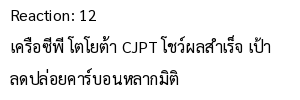

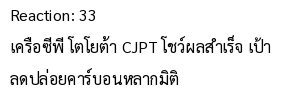

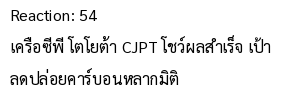

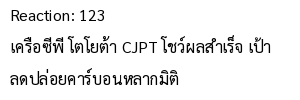

In [ ]:
#@markdown ##### **Enter hex color to color edge of screenshot and press "Run"**

hex_color = "#42f5b9" # @param {type:"string"}
# Check if user set hex_color or not
if hex_color == "":
    color_code = None
else:
    color_code = hex_color.replace("#","")


# Transform user input to dataframe
data = transform_input_to_df(message_boxes, link_boxes, reaction_boxes, header_boxes)
# Create PowerPoint slide with screenshot
create_PowerPoint(data, type_screenshot, highlight_edge = color_code)

In [ ]:
#@markdown ##### **Download PowerPoint result file**

# Download file to local computer
files.download("result_screenshot.pptx")

# Print result
print(Fore.GREEN + "[Success]", "😎 Yay!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Success] 😎 Yay!


## **Extension: Dynamic sizing screenshot (pilot)**

In [ ]:
#@markdown ##### **Press "Run" and enter the number of messages then enter the messages**

# Create function to generate dynamic screenshot
def generate_dynamic_screenshot(message,width=3):
  # To hide warning message
  with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Set dumy message to always get the same message height
        dummy_message = "ผมเป็นมุสลิม รู้ว่ามีฮาลาล วันนี้ผมไปเหมาหมดShelfเลย สาขาใกล้บ้าน มีอยู่ 4 ชิ้นครับ"

        # Set image width and background
        img_width = int(width*100)
        background_color = (255, 255, 255, 0)
        left_margin, right_margin = 10, 10

        # Thai Sarabun font
        thai_font = ImageFont.truetype("/content/Sarabun-Regular.ttf", 16)
        # Emoji font
        emoji_font = ImageFont.truetype("/content/NotoColorEmoji-Regular.ttf", 16)

        # Get existing emoji in the message
        emoji_list = get_existing_emojis(message)
        emoji_set = list(set(emoji_list))

        # Check if there are emojis in message
        if len(emoji_set) == 0:
            split_emoji = [message]
        else:
            # Split emoji
            split_emoji = re.split(r"(" + "|".join(re.escape(e) for e in emoji_set) + r")", message)
            split_emoji = [item for item in split_emoji if item != '']

        # Tokenize message
        result = []
        for item in split_emoji:
            if item.strip() != "":
                # Tokenize non-empty non-emoji items
                tokens = word_tokenize(item)
                result.extend(tokens)
            else:
                result.append(item)

        # Calculate the message width
        each_word_width = []

        for word in result:
            if word in emoji_set:
                each_word_width.append(emoji_font.getsize(word)[0] + 2)
            else:
                each_word_width.append(thai_font.getsize(word)[0])

        # Calculate text height
        text_height = thai_font.getsize(dummy_message)[1] + 5

        # Calculate total width of message
        total_width = sum(each_word_width)

        # Calculate available space for each line
        available_space = img_width - left_margin - right_margin

        # Calculate how many line to plot
        num_line = math.ceil(total_width/available_space)

        # Space line
        space_line = num_line + 1

        # Calculate image height
        img_height = int((num_line*text_height) + (space_line*2.5))

        # Create image
        image = Image.new("RGB", (img_width, img_height), background_color)
        # To render emoji
        pilmoji = Pilmoji(image, source=TwemojiEmojiSource)

        # Calculate space between line
        space = (img_height - text_height*num_line) / space_line

        # Initialize width counter
        width_counter = 0
        # Additional y
        added_y = (space+text_height)

        # Define x and y position
        x = left_margin
        y = space*2

        # Plot text on the image
        for word in result:
            if word in emoji_set:
                emo = True
                word_width = emoji_font.getsize(word)[0] + 2
            else:
                emo = False
                word_width =  thai_font.getsize(word)[0]

            width_counter += word_width

            if width_counter < available_space:
                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

            else:
                # Reset x postion
                x = left_margin
                # Add space for y position
                y += added_y
                # Reset width counter
                width_counter = 0
                # Add word width
                width_counter += word_width

                if emo:
                    try:
                        pilmoji.text((int(x + 2), int(y + 3)), word, font=emoji_font, fill="black")
                        x += word_width
                    except:
                        pass

                else:
                    try:
                        pilmoji.text((int(x), int(y)), word, font=thai_font, fill="black")
                        x += word_width
                    except:
                        pass

  return image

# Define number of box to put messages and links
num_message = 5 #@param {type:"number"}

# Create list to display text input
text_boxes = []

for num in range(num_message):
    text_input = widgets.Text(value="", description=f"Message {num+1}:", placeholder="Enter message")
    text_boxes.append(text_input)

vbox = widgets.VBox(text_boxes)

# Display input boxes
display(vbox)

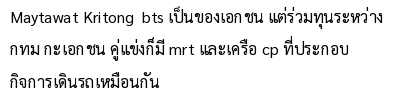

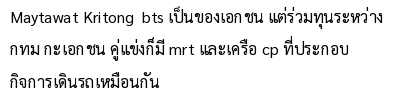

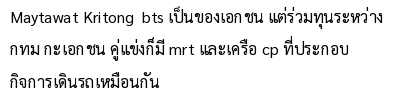

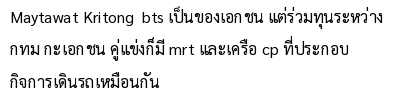

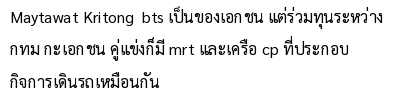

In [ ]:
#@markdown ##### **Set the width of screenshot and press "Run" to generate screenshot**

width = 4 # @param {type:"number"}

# Create function to transform user inputs to dataframe
def transform_input_to_df_for_dynamic_screenshot(text_boxes):
    global df
    # Create list to contain value
    texts = []

    for text in text_boxes:
                texts.append(text.value)

    # Create a DataFrame from the user inputs
    data = {"Message": texts}
    df = pd.DataFrame(data)

    return df

# Create dataframe
data = transform_input_to_df_for_dynamic_screenshot(text_boxes)

# Specify the folder name
folder_name = 'images'

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Generate, save, and display screenshot
for index, row in data.iterrows():
        message = row["Message"]
        img = generate_dynamic_screenshot(message, width)
        img.save(f"/content/images/screenshot_number_{index}.png", dpi=(300, 300))
        display(img)
        print("\n")

In [ ]:
#@markdown ##### **Download image file**

# Create a zip file containing all images in the folder
shutil.make_archive(folder_name, 'zip', folder_name)

# Download the zip file
files.download(folder_name + '.zip')

# Print result
print(Fore.GREEN + "[Success]", "😎 Yay!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Success] 😎 Yay!
